In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from mplsoccer.pitch import Pitch
import matplotlib.pyplot as plt
from matplotlib import transforms
import matplotlib.ticker as mtick
import matplotlib.patheffects as path_effects
import matplotlib.font_manager

In [16]:
df = pd.read_csv('PassManU.csv')

In [17]:
df

,Unnamed: 0,id,eventId,minute,second,teamId,x,y,expandedMinute,period,...,isGoal,cardType,x_metrica,endX_metrica,y_metrica,endY_metrica,EPV_start,EPV_end,EPV_difference,count
0,0,2.328213e+09,5,0,25.0,32,65.40,36.40,0,"{'value': 1, 'displayName': 'FirstHalf'}",...,NaN,NaN,4.770,5.724,-3.060,12.036,0.0164,0.0161,-0.0003,1
1,1,2.328213e+09,6,0,27.0,32,66.60,54.40,0,"{'value': 1, 'displayName': 'FirstHalf'}",...,NaN,NaN,5.830,12.190,12.240,26.928,0.0161,0.0160,-0.0001,1
2,2,2.328213e+09,7,0,29.0,32,73.80,71.68,0,"{'value': 1, 'displayName': 'FirstHalf'}",...,NaN,NaN,12.190,4.028,26.928,15.368,0.0160,0.0148,-0.0012,1
3,3,2.328213e+09,8,0,30.0,32,64.56,58.00,0,"{'value': 1, 'displayName': 'FirstHalf'}",...,NaN,NaN,4.028,1.802,15.300,6.120,0.0148,0.0147,-0.0001,1
4,4,2.328213e+09,9,0,31.0,32,62.04,47.20,0,"{'value': 1, 'displayName': 'FirstHalf'}",...,NaN,NaN,1.802,-11.766,6.120,8.568,0.0147,0.0119,-0.0028,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,597,2.328436e+09,973,91,1.0,32,105.36,17.60,95,"{'value': 2, 'displayName': 'SecondHalf'}",...,NaN,NaN,40.068,28.620,-19.040,-8.160,0.0446,0.0373,-0.0073,1
598,598,2.328437e+09,974,91,4.0,32,92.52,32.00,95,"{'value': 2, 'displayName': 'SecondHalf'}",...,NaN,NaN,28.726,24.698,-6.800,0.068,0.0373,0.0315,-0.0058,1
599,599,2.328437e+09,975,91,7.0,32,89.88,44.40,95,"{'value': 2, 'displayName': 'SecondHalf'}",...,NaN,NaN,26.394,30.210,3.740,7.820,0.0358,0.0419,0.0061,1
600,600,2.328437e+09,976,91,9.0,32,94.20,49.20,95,"{'value': 2, 'displayName': 'SecondHalf'}",...,NaN,NaN,30.210,25.970,7.820,5.916,0.0419,0.0352,-0.0067,1


In [18]:
df['count'] = 1

In [19]:
pass_player = df.groupby(['playerName'])['count'].agg('sum').reset_index().sort_values(by='count',ascending=False)
pass_player

,playerName,count
12,Paul Pogba,106
11,Nemanja Matic,98
9,Luke Shaw,66
6,Harry Maguire,62
13,Raphaël Varane,51
2,Bruno Fernandes,49
0,Aaron Wan-Bissaka,44
3,Cristiano Ronaldo,40
7,Jadon Sancho,34
10,Mason Greenwood,28


In [20]:
manu_player = pass_player['playerName'].unique()

In [21]:
manu_player

array(['Paul Pogba', 'Nemanja Matic', 'Luke Shaw', 'Harry Maguire',
       'Raphaël Varane', 'Bruno Fernandes', 'Aaron Wan-Bissaka',
       'Cristiano Ronaldo', 'Jadon Sancho', 'Mason Greenwood',
       'David de Gea', 'Jesse Lingard', 'Anthony Martial',
       'Donny van de Beek'], dtype=object)

## Cristiano Ronaldo Pass Map

In [27]:
cr = 'Cristiano Ronaldo'

In [30]:
cr = df[df['playerName']== cr]

In [31]:
cr

,Unnamed: 0,id,eventId,minute,second,teamId,x,y,expandedMinute,period,...,isGoal,cardType,x_metrica,endX_metrica,y_metrica,endY_metrica,EPV_start,EPV_end,EPV_difference,count
29,29,2.328219e+09,44,2,47.0,32,72.72,20.24,2,"{'value': 1, 'displayName': 'FirstHalf'}",...,NaN,NaN,11.236,7.420,-16.796,-12.512,0.0179,0.0168,-0.0011,1
36,36,2.328220e+09,55,3,16.0,32,74.52,50.40,3,"{'value': 1, 'displayName': 'FirstHalf'}",...,NaN,NaN,12.826,8.056,8.840,13.668,0.0191,0.0166,-0.0025,1
98,98,2.328243e+09,164,13,5.0,32,43.44,28.96,13,"{'value': 1, 'displayName': 'FirstHalf'}",...,NaN,NaN,-14.628,-9.434,-9.384,-17.544,0.0115,0.0117,0.0002,1
117,117,2.328252e+09,202,16,28.0,32,87.48,80.00,16,"{'value': 1, 'displayName': 'FirstHalf'}",...,NaN,NaN,24.274,11.024,34.000,22.644,0.0227,0.0169,-0.0058,1
126,126,2.328253e+09,213,16,53.0,32,88.92,44.80,16,"{'value': 1, 'displayName': 'FirstHalf'}",...,NaN,NaN,25.546,21.412,4.080,1.020,0.0358,0.0267,-0.0091,1
133,133,2.328255e+09,226,17,51.0,32,83.64,70.56,17,"{'value': 1, 'displayName': 'FirstHalf'}",...,NaN,NaN,20.882,28.302,25.976,17.136,0.0209,0.0299,0.0090,1
135,135,2.328255e+09,228,17,52.0,32,85.92,59.44,17,"{'value': 1, 'displayName': 'FirstHalf'}",...,NaN,NaN,22.896,32.224,16.524,24.956,0.0238,0.0296,0.0058,1
164,164,2.328264e+09,269,21,55.0,32,94.56,13.52,21,"{'value': 1, 'displayName': 'FirstHalf'}",...,NaN,NaN,30.528,21.836,-22.508,-24.140,0.0287,0.0230,-0.0057,1
177,177,2.328266e+09,287,23,0.0,32,70.20,50.88,23,"{'value': 1, 'displayName': 'FirstHalf'}",...,NaN,NaN,9.010,-3.604,9.248,5.304,0.0178,0.0140,-0.0038,1
200,200,2.328278e+09,337,29,19.0,32,79.56,55.36,29,"{'value': 1, 'displayName': 'FirstHalf'}",...,NaN,NaN,17.278,22.366,13.056,-1.904,0.0214,0.0267,0.0053,1


In [36]:
cr = cr.reset_index()

Text(0.5, 1.0, "Cristiano Ronaldo's Pass Map vs Newcastle United")

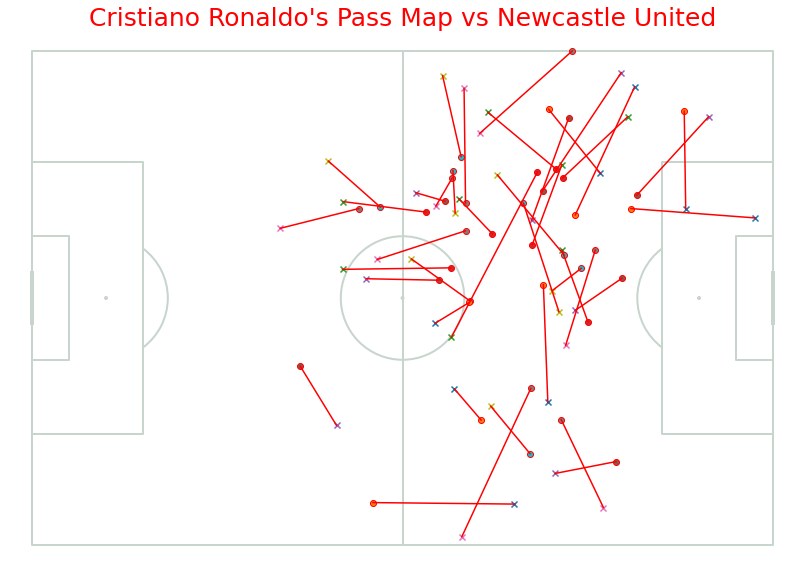

In [42]:
fig ,ax = plt.subplots(figsize=(20.5,10))
background = 'white'
color_line = 'red'
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

#this is how we create the pitch
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color=background, line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)

#Draw the pitch on the ax figure as well as invert the axis for this specific pitch
pitch.draw(ax=ax)
plt.gca().invert_yaxis()

#use a for loop to plot each pass
for x in range(len(cr['x'])):
            ax.plot((cr['x'][x],cr['endX'][x]),(cr['y'][x],cr['endY'][x]),color=color_line)
            ax.scatter(cr['endX'][x],cr['endY'][x],edgecolors='red',marker='x')
            ax.scatter(cr['x'][x],cr['y'][x],edgecolors=color_line)

#plt.scatter(99,10,color=color_line)
#plt.scatter(99,6,color=color_line,marker='x')
#plt.text(100.3,9.12,'Pass Location',size=12,color = color_line)
#plt.text(100.3,5.12,'End Pass Location',size=12,color = color_line)


plt.title("Cristiano Ronaldo's Pass Map vs Newcastle United",color='red',size=25,pad=1)


## Full Team Pass Map

Text(0.52, 1.03, "Manchester United's Successfull Passes\n vs Newcastle United")

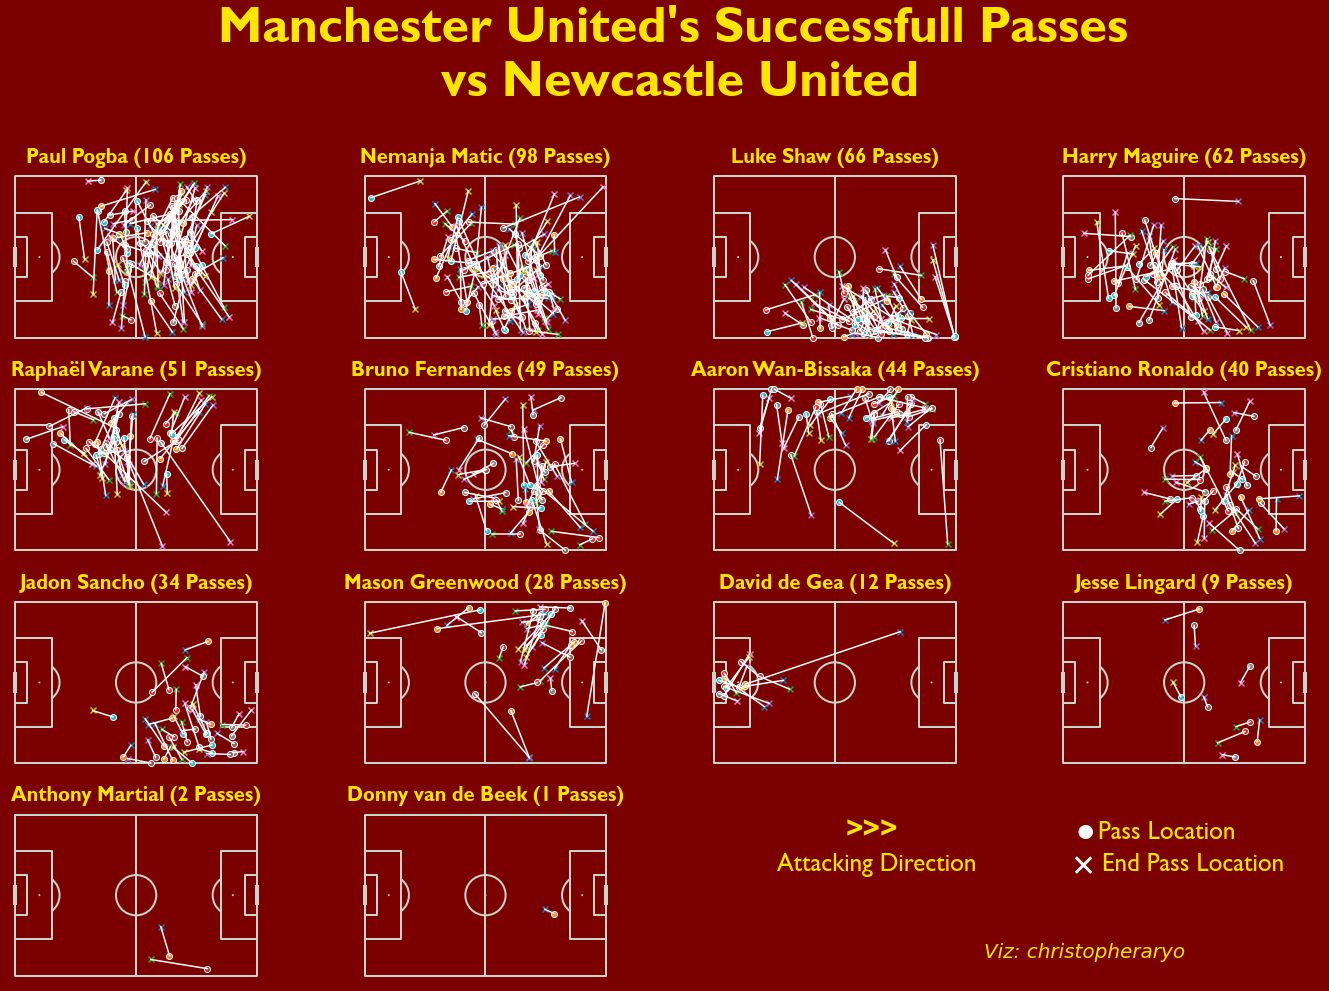

In [22]:
fig ,ax = plt.subplots(4,4,figsize=(24,15))
background = '#7B0101'
color_line = '#ffffff'
fig.set_facecolor(background)
ax.flat[-2].set_visible(False)
ax.flat[-1].set_visible(False)

pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color=background, line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)

for i,ax in enumerate(fig.axes):
    try:
        ax.set_facecolor(background)
        pitch.draw(ax=ax)
        pass_viz = df[df.playerName==manu_player[i]].reset_index()
        total_pass = len(pass_viz)
        for x in range(len(pass_viz['x'])):
            ax.plot((pass_viz['x'][x],pass_viz['endX'][x]),(pass_viz['y'][x],pass_viz['endY'][x]),color=color_line)
            ax.scatter(pass_viz['endX'][x],pass_viz['endY'][x],edgecolors='red',marker='x')
            ax.scatter(pass_viz['x'][x],pass_viz['y'][x],edgecolors=color_line)
            ax.set_title("%s (%s Passes)"%(manu_player[i],total_pass), loc='center', fontsize=20, fontweight='bold', color='#FFE600',fontfamily='Gill Sans MT')
    
    except:
        pass

fig.text(0.75,0.25,'•',size=50,color=color_line)
fig.text(0.75,0.225,'✕',size=30,color=color_line)
fig.text(0.766,0.26,'Pass Location',size=25,color = '#FFE600',fontfamily='Gill Sans MT')
fig.text(0.768,0.23,'End Pass Location',size=25,color = '#FFE600',fontfamily='Gill Sans MT')
fig.text(0.62,0.26,'>>>',size=30,color = '#FFE600',fontfamily='Gill Sans MT',fontweight='bold')
fig.text(0.58,0.23,'Attacking Direction',size=25,color = '#FFE600',fontfamily='Gill Sans MT')
plt.ylim(1.2)

#im = plt.imread('italy_logo.png')

#newax = fig.add_axes([0.29, 0.98, 0.06, 0.06], anchor='NE', zorder=-1)
#newax.imshow(im)
#newax.axis('off')


fig.text(0.7,0.15,'Viz: christopheraryo',fontstyle='italic',size=20,color='#FFE600')
plt.suptitle("Manchester United's Successfull Passes\n vs Newcastle United", fontsize=50, fontweight='bold', color='#FFE600', x = 0.52 ,y=1.03,fontfamily='Gill Sans MT')
#plt.savefig('ManchesterUnited.png')